
This notebook is owned by Mohamad Haikal bin Mohamad Nazari















# Power Consumption of Tetouan City

The dataset provides valuable insights into power consumption across three distribution networks in Tetouan, North Morocco. Understanding these consumption patterns is crucial for infrastructure planning and sustainable development. Tetouan's vibrant communities rely on these networks for uninterrupted electricity supply, supporting socioeconomic activities. Analyzing the data can reveal seasonal variations, peak usage periods, and emerging trends, aiding policymakers in optimizing energy distribution and implementing targeted interventions. Moreover, researchers can use this dataset to study energy consumption behaviors and evaluate conservation initiatives, contributing to advancements in energy economics and environmental sustainability. Ultimately, leveraging this data empowers stakeholders to build a resilient and efficient energy infrastructure, meeting the evolving needs of Tetouan's diverse population while fostering long-term sustainability.

---


The dataset is provided and includes various variables. These include DateTime, Temperature, Humidity, Wind Speed, general diffuse flows, diffuse flows, and power consumption data. DateTime is recorded at ten-minute intervals. Temperature and Humidity are included to give insights into Tetouan's weather conditions. Wind Speed shows the wind speed in the city. Information on general diffuse flows and diffuse flows is also included. The main focus is on the power consumption data for Zone 1, Zone 2, and Zone 3 within Tetouan. This data provides valuable insights into energy usage patterns and can be used to make informed decisions for energy management and urban planning initiatives. A summary of the variables in the dataset is shown in the table below.

| Variable Name             | Type       | Description                                     |
|---------------------------|------------|-------------------------------------------------|
| DateTime                  | Date       | Each ten minutes                                |
| Temperature               | Continuous | Weather Temperature of Tetouan city             |
| Humidity                  | Continuous | Weather Humidity of Tetouan city                |
| Wind Speed                | Continuous | Wind speed of Tetouan city                      |
| general diffuse flows     | Continuous | General diffuse flows                           |
| diffuse flows             | Continuous | Diffuse flows                                   |
| Zone 1 Power Consumption  | Continuous | Power consumption of zone 1 of Tetouan city     |
| Zone 2 Power Consumption  | Continuous | Power consumption of zone 2 of Tetouan city     |
| Zone 3 Power Consumption  | Continuous | Power consumption of zone 3 of Tetouan city     |

## Import file and load from Drive



In the initial step of data preprocessing, the dataset containing information on power consumption across three distribution networks in Tetouan city is imported.

In [ ]:
# Import the 'drive' module from the 'google.colab' library
from google.colab import drive

# Mount the user's Google Drive to the specified directory ('/content/drive')
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

warnings.filterwarnings("ignore")

In [ ]:
# Define the file path of the CSV file to be read
#file_path = "/content/drive/MyDrive/Data_Science/Project_ML/Tetuan_City_power_consumption.csv"
file_path = "/content/drive/MyDrive/Tetuan_City_power_consumption.csv"
#file_path = "Tetuan_City_power_consumption.csv"

# Use the pd.read_csv() function to read the CSV file and store it in the variable pwr
pwr = pd.read_csv(file_path)

In [ ]:
pwr.head()

DateTime  temperature  humidity  wind_speed  general_diffuse_flows  \
0  1/1/2017 0:00        6.559      73.8       0.083                  0.051   
1  1/1/2017 0:10        6.414      74.5       0.083                  0.070   
2  1/1/2017 0:20        6.313      74.5       0.080                  0.062   
3  1/1/2017 0:30        6.121      75.0       0.083                  0.091   
4  1/1/2017 0:40        5.921      75.7       0.081                  0.048   

   diffuse_flows  z1_power_consumption  z2_power_consumption  \
0          0.119           34055.69620           16128.87538   
1          0.085           29814.68354           19375.07599   
2          0.100           29128.10127           19006.68693   
3          0.096           28228.86076           18361.09422   
4          0.085           27335.69620           17872.34043   

   z3_power_consumption  
0           20240.96386  
1           20131.08434  
2           19668.43373  
3           18899.27711  
4           18442.40964

## Preprocessing: Data filtering and cleaning

Following data acquisition, the dataset undergoes preprocessing to facilitate subsequent analysis. This critical stage ensures data quality through a series of steps, including imputing missing values, standardizing data formats for consistency, and verifying data integrity. Additionally, extraneous columns such as unit labels and missing value indicators are removed to streamline the dataset. This meticulous preparation process readies the data for in-depth exploration and robust model development.

The initial data cleaning step focuses on ensuring consistency within the dataset. This is achieved by replacing non-numeric values with null values. Non-numeric values, such as text entries, can introduce inconsistencies and potentially skew analyses. Replacing them with null values creates a uniform representation of missing data, simplifying subsequent processing and analysis. Additionally, this approach allows for the identification and handling of missing data points during later stages, such as modeling. Ultimately, this data cleaning methodology enhances the quality and reliability of the dataset, leading to more robust and accurate insights.

In [ ]:
# Drop the 'DateTime' column from the 'pwr' DataFrame in-place

pwr.drop(["DateTime"], axis=1, inplace=True)

In [ ]:
pwr.head()

temperature  humidity  wind_speed  general_diffuse_flows  diffuse_flows  \
0        6.559      73.8       0.083                  0.051          0.119   
1        6.414      74.5       0.083                  0.070          0.085   
2        6.313      74.5       0.080                  0.062          0.100   
3        6.121      75.0       0.083                  0.091          0.096   
4        5.921      75.7       0.081                  0.048          0.085   

   z1_power_consumption  z2_power_consumption  z3_power_consumption  
0           34055.69620           16128.87538           20240.96386  
1           29814.68354           19375.07599           20131.08434  
2           29128.10127           19006.68693           19668.43373  
3           28228.86076           18361.09422           18899.27711  
4           27335.69620           17872.34043           18442.40964

In [ ]:
# Display the data types of each column
print(pwr.dtypes)

temperature              float64
humidity                 float64
wind_speed               float64
general_diffuse_flows    float64
diffuse_flows            float64
z1_power_consumption     float64
z2_power_consumption     float64
z3_power_consumption     float64
dtype: object


In [ ]:
# Replace non-numeric characters with an empty string
pwr = pwr.replace({'[^0-9.]': ''}, regex=True)

# Replace remaining empty strings with NaN
pwr = pwr.replace({'': np.nan})

# Convert the column to float
pwr = pwr.astype(float)

In [ ]:
# Reset the index of the 'pwr' DataFrame, dropping the old index
pwr.reset_index(drop=True, inplace = True)

In [ ]:
pwr.head()

temperature  humidity  wind_speed  general_diffuse_flows  diffuse_flows  \
0        6.559      73.8       0.083                  0.051          0.119   
1        6.414      74.5       0.083                  0.070          0.085   
2        6.313      74.5       0.080                  0.062          0.100   
3        6.121      75.0       0.083                  0.091          0.096   
4        5.921      75.7       0.081                  0.048          0.085   

   z1_power_consumption  z2_power_consumption  z3_power_consumption  
0           34055.69620           16128.87538           20240.96386  
1           29814.68354           19375.07599           20131.08434  
2           29128.10127           19006.68693           19668.43373  
3           28228.86076           18361.09422           18899.27711  
4           27335.69620           17872.34043           18442.40964

In [ ]:
# Calculate the sum of null values for each column in the pwr DataFrame
sum_null = pd.Series.to_dict(pwr.isnull().sum())

# Get the total number of index values in the pwr DataFrame
sum_index = pwr.index.size

# Print the total number of index values
print(f"Total of index values: {sum_index}\n")

# Print the percentage of null values in each column
print(f"The percentage of N/A in each columns:")
for col, tot in sum_null.items():
    # Calculate the percentage of null values in the current column
    percent_null = tot/sum_index * 100
    # Print the column name and its percentage of null values
    print(f"{col} : {percent_null:.2f}%")

Total of index values: 52416

The percentage of N/A in each columns:
temperature : 0.00%
humidity : 0.00%
wind_speed : 0.00%
general_diffuse_flows : 0.00%
diffuse_flows : 0.00%
z1_power_consumption : 0.00%
z2_power_consumption : 0.00%
z3_power_consumption : 0.00%


The description above indicates that after the data cleaning process, each column has been scanned for null values, and no null values were observed in any column. This outcome suggests that the data cleaning procedures effectively addressed any non-numeric values and converted empty strings to null values, resulting in a dataset without missing values. The absence of null values in the dataset enhances its integrity and reliability, providing a solid foundation for subsequent data analysis, modeling, and interpretation. With a clean and complete dataset, we can proceed confidently with the data to data extraction section next.

## Data Extraction

In this section, main objective is to extract the cleaned Power Consumption data in Tetouan City. This process is conducted with the  aim of unraveling the comprehensive descriptive statistical summary of the entirety of the dataset's attributes. A multitude of essential metrics defining the essence of the data, including mean, standard deviation, minimum, and maximum values across various parameters, are sought to be uncovered through this rigorous examination.

In [ ]:
# Generate descriptive statistics of the DataFrame 'pwr'
pwr.describe()

temperature      humidity    wind_speed  general_diffuse_flows  \
count  52416.000000  52416.000000  52416.000000           52416.000000   
mean      18.810024     68.259518      1.959489             182.696614   
std        5.815476     15.551177      2.348862             264.400960   
min        3.247000     11.340000      0.050000               0.004000   
25%       14.410000     58.310000      0.078000               0.062000   
50%       18.780000     69.860000      0.086000               5.035500   
75%       22.890000     81.400000      4.915000             319.600000   
max       40.010000     94.800000      6.483000            1163.000000   

       diffuse_flows  z1_power_consumption  z2_power_consumption  \
count   52416.000000          52416.000000          52416.000000   
mean       75.028022          32344.970564          21042.509082   
std       124.210949           7130.562564           5201.465892   
min         0.011000          13895.696200           8560.081466   
25%         0.122000          26310.668692          16980.766032   
50%         4.456000          32265.920340          20823.168405   
75%       101.000000          37309.018185          24713.717520   
max       936.000000          52204.395120          37408.860760   

       z3_power_consumption  
count          52416.000000  
mean           17835.406218  
std             6622.165099  
min             5935.174070  
25%            13129.326630  
50%            16415.117470  
75%            21624.100420  
max            47598.326360

Based on table summary above,

1.   The dataset has 52,416 rows of data.
2. Tetouan City's average conditions during the data collection were approximately 18.8°C temperature, 68.2% humidity, and 1.9m/s wind speed.
3. On average, power consumption in Zone 1 appears to be higher than in Zones 2 and 3.



In [ ]:
# Provide information about the object's properties, settings, or status.
print(pwr.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   temperature            52416 non-null  float64
 1   humidity               52416 non-null  float64
 2   wind_speed             52416 non-null  float64
 3   general_diffuse_flows  52416 non-null  float64
 4   diffuse_flows          52416 non-null  float64
 5   z1_power_consumption   52416 non-null  float64
 6   z2_power_consumption   52416 non-null  float64
 7   z3_power_consumption   52416 non-null  float64
dtypes: float64(8)
memory usage: 3.2 MB
None


In [ ]:
# Get the number of unique values in the 'pwr' column
pwr.nunique()

temperature               3437
humidity                  4443
wind_speed                 548
general_diffuse_flows    10504
diffuse_flows            10449
z1_power_consumption     27709
z2_power_consumption     29621
z3_power_consumption     22838
dtype: int64

Based on cell above, the dataset reveals frequent occurrences of similar data points. To leverage this finding, the data is classified based on these recurring patterns. Each category will include data points exhibiting the same pattern, allowing for further analysis of frequently occurring trends within the dataset. The grouping is demonstrate as below.

In [ ]:
# Iterate through each column in the DataFrame 'pwr'
for column in pwr.columns:

  # Print the header for the current column's value count
  print(f"\nValue count for {column} in ascending order\n")

  # Print the value counts for the current column, sorted in ascending order
  print(pwr[str(column)].value_counts().sort_values())

  # Print a separator line
  print("________________________________________________________")


Value count for temperature in ascending order

temperature
6.580      1
6.421      1
6.145      1
30.850     1
33.190     1
          ..
20.830    51
20.740    52
19.790    55
20.760    56
15.180    58
Name: count, Length: 3437, dtype: int64
________________________________________________________

Value count for humidity in ascending order

humidity
45.89      1
47.64      1
51.41      1
43.23      1
36.66      1
        ... 
86.30    186
86.60    187
85.00    189
84.60    190
85.90    197
Name: count, Length: 4443, dtype: int64
________________________________________________________

Value count for wind_speed in ascending order

wind_speed
3.006       1
1.995       1
3.908       1
1.274       1
2.853       1
         ... 
0.085    1513
0.081    1804
0.084    1831
0.083    1979
0.082    2291
Name: count, Length: 548, dtype: int64
________________________________________________________

Value count for general_diffuse_flows in ascending order

general_diffuse_flows
5.819       1


## Data Visualization

After undergoing data cleaning and classification, the data is then visualized by being plotted in the style of a histogram for all the variables which are:


1.   Temperature
2.   Humidity
3.   Wind Speed
4.   Diffuse Flows
5.   General Diffuse flows




### Power consumption across data

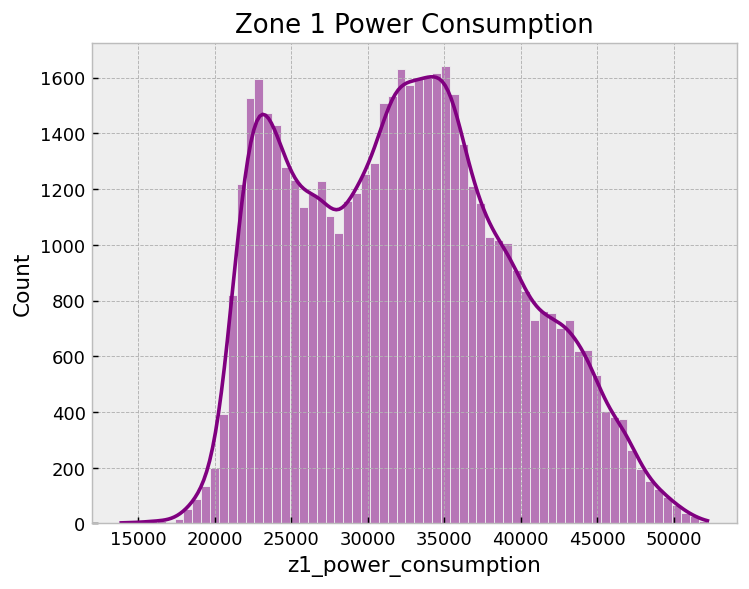

In [ ]:
# Set the figure resolution to 130 dots per inch
plt.figure(dpi=130)

# Apply the 'bmh' style to the plot
plt.style.use('bmh')

# Create a histogram plot using seaborn's 'histplot' function
# Use the 'z1_power_consumption' column of the 'pwr' DataFrame as the data to plot
# Enable the Kernel Density Estimate (KDE) and set the color to purple
sns.histplot(data=pwr, x="z1_power_consumption", kde=True, color='purple')

# Set the title of the plot
plt.title("Zone 1 Power Consumption")

# Display the plot
plt.show()

Based from figure above, power consumption in Zone 1 is following the normal distribution with frequent usage around 35kWh is the highest.

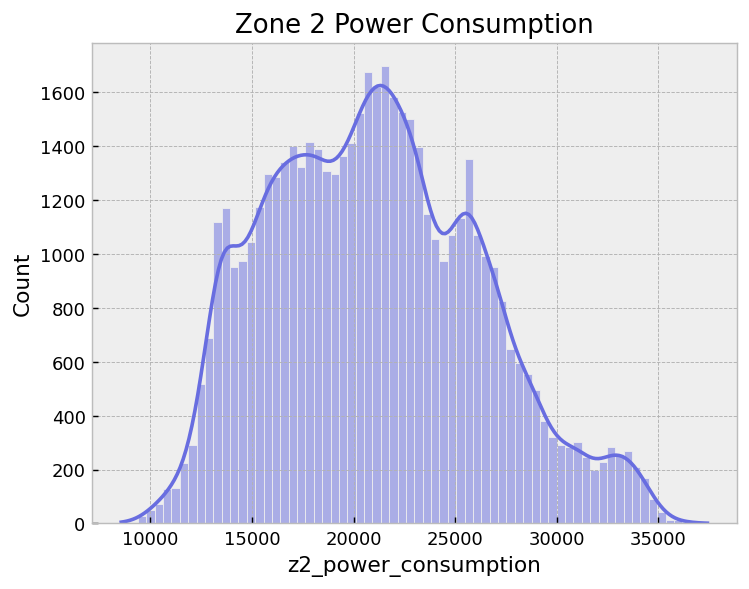

In [ ]:
# Set the resolution of the figure
plt.figure(dpi=130)

# Apply the 'bmh' style to the figure
plt.style.use('bmh')

# Create a histogram plot using seaborn's 'histplot' function
# Use the 'pwr' DataFrame, with 'z2_power_consumption' as the x-axis variable
# Enable Kernel Density Estimation (KDE) and set the color to '#686de0'
sns.histplot(data=pwr, x="z2_power_consumption", kde=True, color='#686de0')

# Set the title of the plot
plt.title("Zone 2 Power Consumption")

# Display the plot
plt.show()

Based from the figure above, Zone 2 looks having the normal distribution with most frequent usage power around 21kWh. The power consumption in Zone 2 is lower compare to Zone 1.

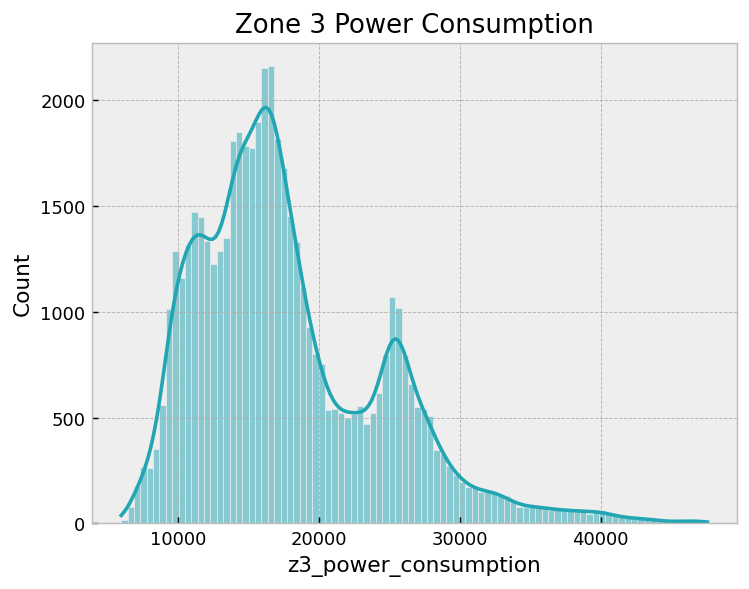

In [ ]:
# Set the resolution of the figure
plt.figure(dpi=130)

# Apply the 'bmh' style to the figure
plt.style.use('bmh')

# Create a histogram plot using seaborn's 'histplot' function
# The data source is 'pwr' dataset, with 'z3_power_consumption' as the variable to be plotted
# A kernel density estimate (KDE) is applied to the data, and the color of the plot is set to '#22a6b3'
sns.histplot(data=pwr, x="z3_power_consumption", kde=True, color='#22a6b3')

# Set the title of the plot
plt.title("Zone 3 Power Consumption")

# Display the plot
plt.show()

On the figure above shows that the distribution of power consumption which in Zone 3. From the pattern the power is concentrated to the left of the graph which follows left-skewed distribution. Most frequent power usage in Zone 3 is in around 15kWh which is the lowest compare to all other 2 zones.

In summary, the brief explanation about 3 zones in Tetouan City is given by the above graph. Zone 1 is possibly inhabited by higher power consumers, such as industrial and factories. Zone 2 is situated between Zone 1 and 3 and can be assumed to have a mixed residential and commercial area with both medium-sized homes and small apartment buildings. Zone 3 might be a rural area or a neighborhood with smaller, energy-efficient homes and apartments.

## 1) Temperature

In [ ]:
# Set the resolution of the figure in Dots Per Inch (DPI)
plt.figure(dpi=130)

# Apply the 'bmh' style to the figure
plt.style.use('bmh')

# Create a histogram plot using seaborn's 'histplot' function
# Use the 'pwr' DataFrame, with 'temperature' as the x-axis variable
# Apply a kernel density estimate (KDE) and color the plot red
sns.histplot(data=pwr, x="temperature", kde=True, color='red')

# Add a title to the plot
plt.title("Temperature")

# Display the plot
plt.show()

The figure above shows that the temperature across the data over with the number of occurance plotted in histogram. From the observation we can see that the shape is following the normal distribution. Most of the place on the data gathered occurs on the temperature 21 value. Least frequent temperature on Tetouan city taken on around 40 value.

### Power consumption Zone1 vs Temperature

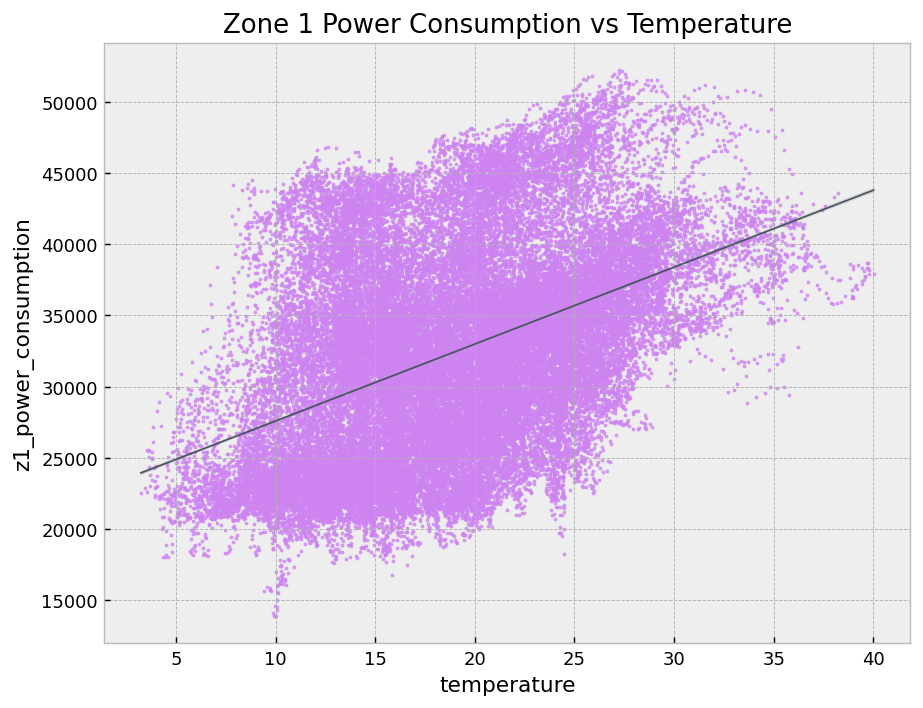

In [ ]:
# Create a new figure with a specified size and resolution
plt.figure(figsize=(8,6), dpi = 130)

# Use the 'bmh' style for the plot
plt.style.use('bmh')

# Create a scatter plot with a regression line using seaborn
sns.regplot(data=pwr,
            x='temperature',  # Use the 'temperature' column for the x-axis
            y="z1_power_consumption",  # Use the 'z1_power_consumption' column for the y-axis
            marker="x",  # Use a cross ('x') marker for the data points
            scatter_kws={'s':0.75},  # Set the size of the scatter points to 0.75
            color="#cd84f1",  # Set the color of the scatter points to a shade of purple
            line_kws={'color':'#485460','lw':0.95},  # Set the color and linewidth of the regression line
            order=1)  # Use a polynomial regression of degree 1

# Set the title of the plot
plt.title("Zone 1 Power Consumption vs Temperature")

# Display the plot
plt.show()

In Zone 1, where power consumption is highest, a scattered plot was created to show the relationship between temperature and power usage. The observed phenomenon is that as the temperature rises, there is a tendency for power consumption to also increase. This indicates a positive correlation between temperature and power consumption, meaning that as one variable increases, the other tends also increases. Moreover, the correlation between temperature and power consumption in Zone 1 is strong, suggesting that changes in temperature are closely associated with changes in power usage. This strong correlation implies that temperature has a significant impact on the amount of power consumed in Zone 1.


### Power consumption Zone2 vs Temperature

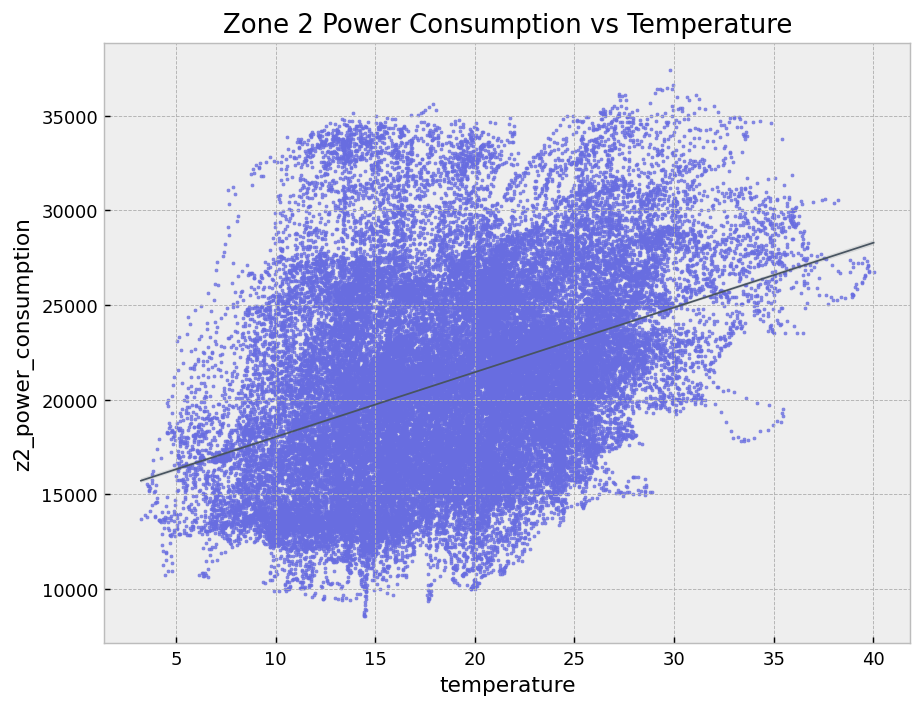

In [ ]:
# Set the figure size and resolution
plt.figure(figsize=(8,6), dpi = 130)

# Use the 'bmh' style for the plot
plt.style.use('bmh')

# Create a scatter plot with a regression line
sns.regplot(data=pwr,
            x='temperature',  # Use the 'temperature' column as the x-axis
            y="z2_power_consumption",  # Use the 'z2_power_consumption' column as the y-axis
            marker="x",  # Use crosses as the scatter plot markers
            scatter_kws={'s':0.75},  # Set the size of the scatter plot markers
            color="#686de0",  # Set the color of the scatter plot markers and regression line
            line_kws={'color':'#485460','lw':0.95},  # Set the color and linewidth of the regression line
            order=1)  # Use a polynomial regression of degree 1

# Set the title of the plot
plt.title("Zone 2 Power Consumption vs Temperature")

# Display the plot
plt.show()


In Zone 2, which lies between Zone 1 and Zone 3 in terms of power consumption, a scattered plot was analyzed to illustrate the connection between temperature and power usage. What emerged from the data is a positive correlation, indicating that as temperatures increase, power consumption tends to rise as well. This positive correlation suggests that there is a tendency for power usage to increase with higher temperatures in this zone. Furthermore, the correlation between temperature and power consumption in Zone 2 is notably strong, signifying that changes in temperature closely correspond to changes in power usage. This strong correlation underscores the significant influence of temperature on power consumption levels within Zone 2.

In summary, temperature has a consistent effect across all three zones in terms of power consumption, where as temperature increases, so does power consumption, indicating a positive correlation between the two variables with strong correlation.

### Power consumption Zone3 vs Temperature

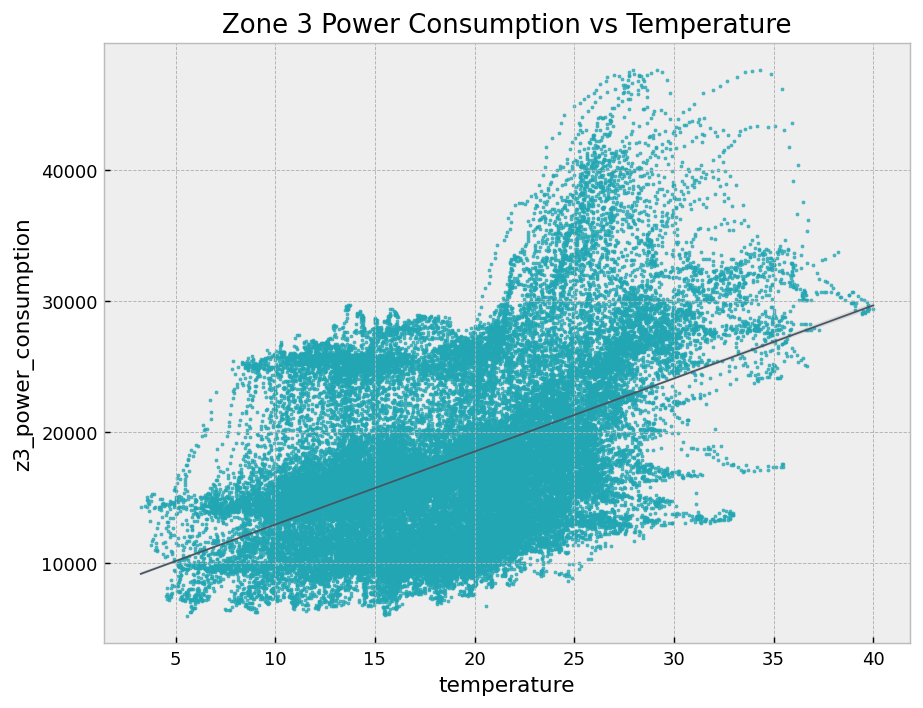

In [ ]:
# Set the figure size and resolution
plt.figure(figsize=(8,6), dpi = 130)

# Use the 'bmh' style for the plot
plt.style.use('bmh')

# Create a scatter plot with a regression line for temperature in Zone 3
sns.regplot(data=pwr,
            x='temperature',  # Use the 'temperature' column as the x-axis
            y="z3_power_consumption",  # Use the 'z3_power_consumption' column as the y-axis
            marker="x",  # Use crosses as the scatter plot markers
            scatter_kws={'s':0.75},  # Set the size of the scatter plot markers
            color="#22a6b3",  # Set the color of the scatter plot markers and regression line
            line_kws={'color':'#485460','lw':0.95},  # Set the color and linewidth of the regression line
            order=1)  # Use a polynomial regression of degree 1

# Set the title of the plot
plt.title("Zone 3 Power Consumption vs Temperature")

# Display the plot
plt.show()

In Zone 3, where power consumption is lowest, we looked at a graph that compared temperature with power usage. It showed that as temperature increases, power consumption also goes up, indicating a positive connection between the two. This means when it gets hotter, more power tends to be used. Additionally, the link between temperature and power usage in Zone 3 is strong, meaning changes in temperature strongly affect changes in power consumption. So, even in Zone 3 with low power usage, temperature still plays a significant role in determining how much power is used.

## 2) Humidity

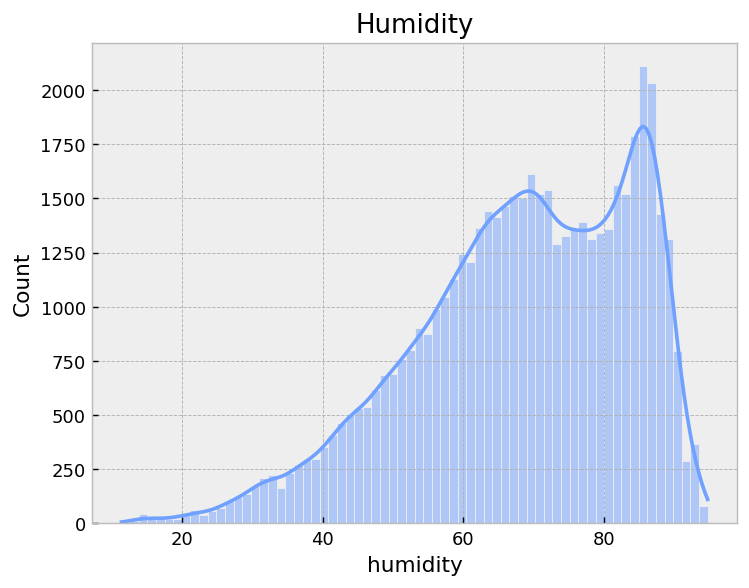

In [ ]:
# Set the resolution of the figure
plt.figure(dpi=130)

# Apply the 'bmh' style to the figure
plt.style.use('bmh')

# Create a histogram plot using seaborn's 'histplot' function
# Use the 'humidity' column of the 'pwr' DataFrame as the data to plot
# Enable Kernel Density Estimation (KDE) for a smoothed distribution curve
# Set the color of the plot to '#70a1ff'
sns.histplot(data=pwr, x='humidity', kde=True, color='#70a1ff')

# Set the title of the plot to "Humidity"
plt.title("Humidity")

# Display the plot
plt.show()

Graph above shows the recorded data of Tetouan City's humidity percentage against the frequency of its occurrences. The figure depicts a right-skewed distribution, with the highest frequency observed at around 85% humidity.

### Power consumption Zone1 vs Humidity

In [ ]:
# Set figure size and resolution
plt.figure(figsize=(8,6), dpi = 130)

# Use the seaborn plot style 'bmh'
plt.style.use('bmh')

# Create a regression plot of power consumption vs. humidity
sns.regplot(data=pwr,
            x='humidity',  # Set humidity as x-axis
            y="z1_power_consumption",  # Set power consumption as y-axis
            marker="x",  # Set the marker style to x
            scatter_kws={'s':0.75},  # Set the scatter plot size
            color="#cd84f1",  # Set the color of the scatter plot
            line_kws={'color':'#485460','lw':0.95},  # Set the color and linewidth of the regression line
            order=1) # Set the order of the polynomial used to fit the data

# Add a title to the plot
plt.title("Zone 1 Power Consumption vs Humidity")

# Display the plot
plt.show()


In Zone 1, a scatter plot was analyzed to compare humidity with power consumption. It showed that as humidity increases, power usage tends to decrease, indicating a negative correlation between the two factors. This suggests that when humidity rises, power consumption tends to drop. Moreover, the correlation between humidity and power consumption in Zone 1 is strong, meaning changes in humidity significantly influence changes in power usage.

### Power consumption Zone2 vs Humidity

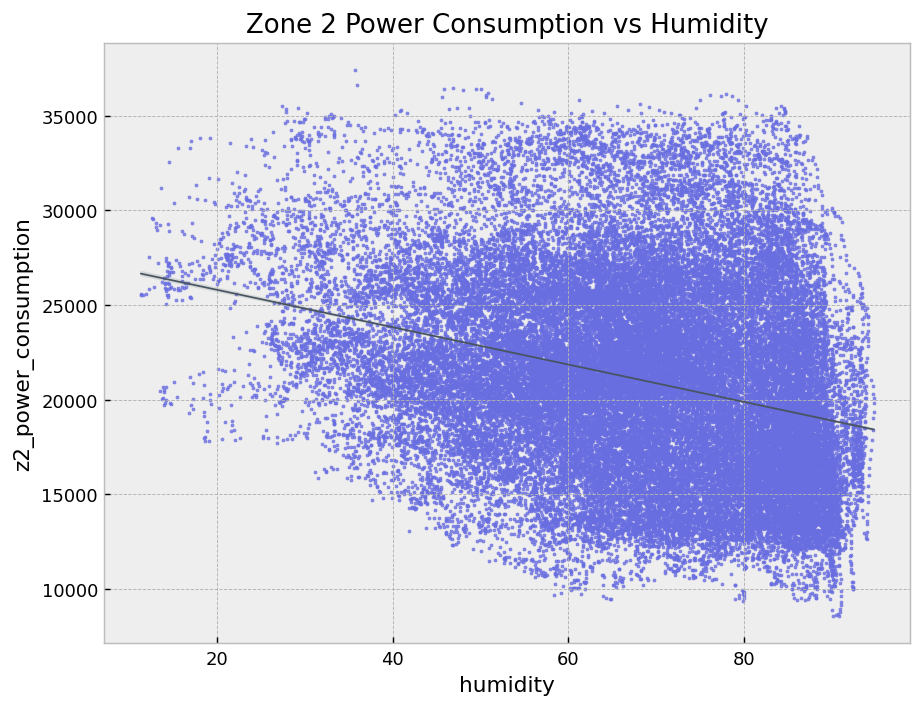

In [ ]:
# Import the necessary packages and modules
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size and resolution
plt.figure(figsize=(8,6), dpi = 130)

# Use the 'bmh' style for the plot
plt.style.use('bmh')

# Create a scatter plot with a regression line
sns.regplot(data=pwr,
            x='humidity',  # Use the 'humidity' column as the x-axis
            y="z2_power_consumption",  # Use the 'z2_power_consumption' column as the y-axis
            marker="x",  # Use crosses as the scatter plot markers
            scatter_kws={'s':0.75},  # Set the size of the scatter plot markers
            color="#686de0",  # Set the color of the scatter plot markers and regression line
            line_kws={'color':'#485460','lw':0.95},  # Set the color and linewidth of the regression line
            order=1)  # Use a polynomial regression of degree 1

# Set the title of the plot
plt.title("Zone 2 Power Consumption vs Humidity")

# Display the plot
plt.show()


In Zone 2, a scatter plot was examined to understand the relationship between humidity and power consumption. It revealed that as humidity levels rise, there is a tendency for power usage to decrease, indicating a negative correlation between the two variables. This implies that higher humidity is associated with lower power consumption in Zone 2. Furthermore, the correlation between humidity and power consumption in Zone 2 is strong, highlighting the significant impact of humidity on power usage patterns in this area.

### Power consumption Zone3 vs Humidity

In [ ]:
# Set the figure size and resolution
plt.figure(figsize=(8,6), dpi = 130)

# Use the 'bmh' style for the plot
plt.style.use('bmh')

# Create a scatter plot with a regression line for humidity in Zone 3
sns.regplot(data=pwr,
            x='humidity',  # Use the 'humidity' column as the x-axis
            y="z3_power_consumption",  # Use the 'z3_power_consumption' column as the y-axis
            marker="x",  # Use crosses as the scatter plot markers
            scatter_kws={'s':0.75},  # Set the size of the scatter plot markers
            color="#22a6b3",  # Set the color of the scatter plot markers and regression line
            line_kws={'color':'#485460','lw':0.95},  # Set the color and linewidth of the regression line
            order=1)  # Use a polynomial regression of degree 1

# Set the title of the plot
plt.title("Zone 3 Power Consumption vs Humidity")

# Display the plot
plt.show()


In Zone 3, a scatter plot was analyzed to explore the connection between humidity and power consumption. It was observed that as humidity increases, there is a tendency for power usage to decrease, indicating a negative correlation between the two factors. This suggests that higher humidity levels are associated with lower power consumption in Zone 3. Additionally, the correlation between humidity and power consumption in Zone 3 is strong, indicating that changes in humidity have a notable influence on changes in power usage within this zone.

In summary, across all three zones, there is a consistent pattern indicating that as humidity increases, power consumption decreases. This negative correlation is evident in Zone 1, Zone 2, and Zone 3, where higher humidity levels are associated with lower power usage. One possible explanation for this phenomenon is the effect of weather on human behavior and energy demand. When humidity rises, people may be less inclined to engage in physical activities or outdoor tasks, leading to decreased use of energy-intensive appliances such as air conditioners, fans, or heaters. Additionally, higher humidity levels can often indicate cooler temperatures, reducing the need for heating or cooling systems and thus lowering overall power consumption. Therefore, the negative correlation between humidity and power consumption suggests that changes in weather conditions, particularly humidity, can significantly influence energy usage patterns.

## 3) Wind speed

In [ ]:
# Set the resolution of the figure
plt.figure(dpi=130)

# Apply the 'bmh' style to the figure
plt.style.use('bmh')

# Create a histogram plot with the 'wind_speed' column of the 'pwr' DataFrame
# Use a Kernel Density Estimate (KDE) for smoother density curve and set the color to blue
sns.histplot(data=pwr, x='wind_speed', kde=True, color='blue')

# Add a title to the plot
plt.title("Wind speed")

# Display the plot
plt.show()


The figure displays a histogram plotting wind speed against the frequency of its occurrences for overall collected data. It illustrates two notable peaks which is the highest frequency is around 0.2 m/s, with another peak observed at 4.8 m/s, while the remaining frequencies are nearly zero.

### Power consumption Zone1 vs Wind Speed

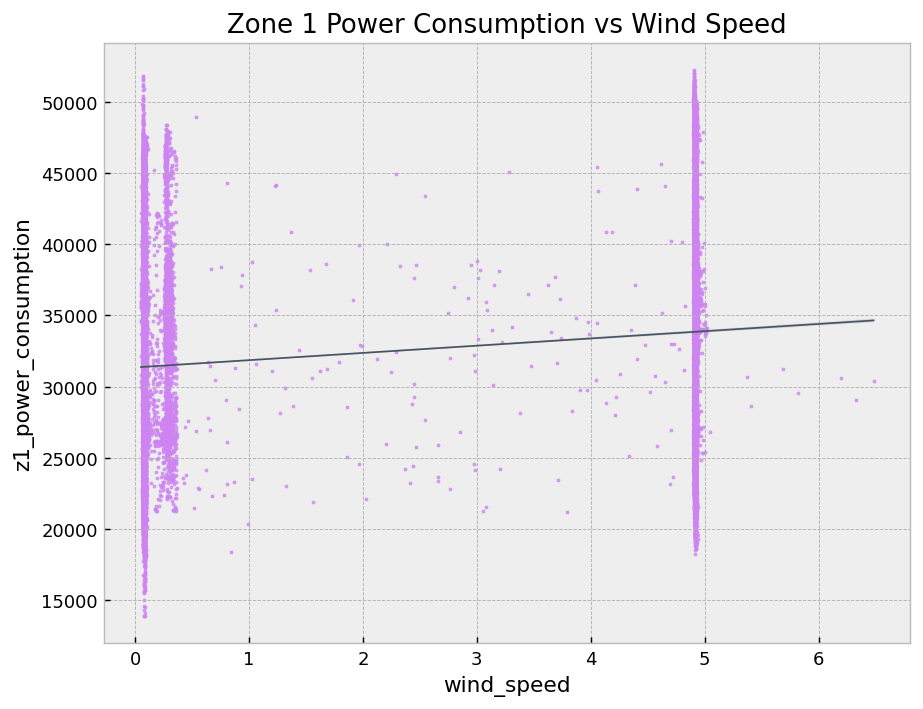

In [ ]:
# Set figure size and resolution
plt.figure(figsize=(8,6), dpi = 130)

# Use the seaborn plot style 'bmh'
plt.style.use('bmh')

# Create a regression plot of power consumption vs. wind speed
sns.regplot(data=pwr,
            x='wind_speed',  # Set wind speed as x-axis
            y="z1_power_consumption",  # Set power consumption as y-axis
            marker="x",  # Set the marker style to x
            scatter_kws={'s':0.75},  # Set the scatter plot size
            color="#cd84f1",  # Set the color of the scatter plot
            line_kws={'color':'#485460','lw':0.95},  # Set the color and linewidth of the regression line
            order=1) # Set the order of the polynomial used to fit the data

# Add a title to the plot
plt.title("Zone 1 Power Consumption vs Wind Speed")

# Display the plot
plt.show()


A graph showing the relationship between wind speed and power consumption in Zone 1 was plotted. It was found that there is a positive correlation between wind speed and power consumption, but it is weak correlation.

### Power consumption Zone2 vs Wind Speed

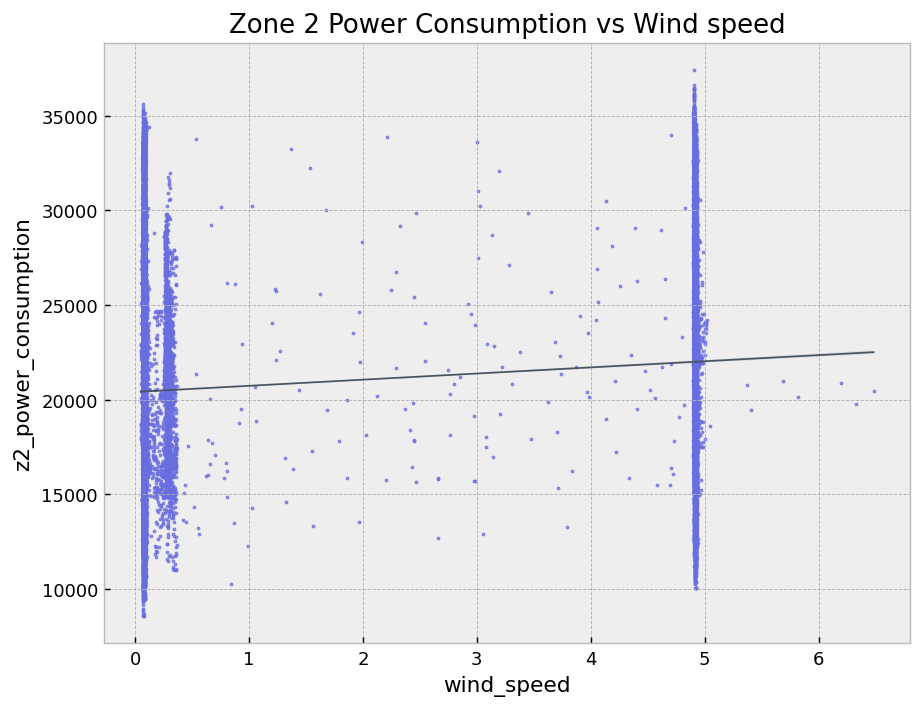

In [ ]:
# Set the figure size and resolution
plt.figure(figsize=(8,6), dpi = 130)

# Use the 'bmh' style for the plot
plt.style.use('bmh')

# Create a scatter plot with a regression line for wind speed
sns.regplot(data=pwr,
            x='wind_speed',  # Use the 'wind_speed' column as the x-axis
            y="z2_power_consumption",  # Use the 'z2_power_consumption' column as the y-axis
            marker="x",  # Use crosses as the scatter plot markers
            scatter_kws={'s':0.75},  # Set the size of the scatter plot markers
            color="#686de0",  # Set the color of the scatter plot markers and regression line
            line_kws={'color':'#485460','lw':0.95},  # Set the color and linewidth of the regression line
            order=1)  # Use a polynomial regression of degree 1

# Set the title of the plot
plt.title("Zone 2 Power Consumption vs Wind speed")

# Display the plot
plt.show()

A graph was plotted to display the relationship between wind speed and power consumption in Zone 2. It was observed that there exists a positive correlation between wind speed and power consumption, albeit weak correlation.

### Power consumption Zone3 vs Wind Speed

In [ ]:
# Set the figure size and resolution
plt.figure(figsize=(8,6), dpi = 130)

# Use the 'bmh' style for the plot
plt.style.use('bmh')

# Create a scatter plot with a regression line for wind speed in Zone 3
sns.regplot(data=pwr,
            x='wind_speed',  # Use the 'wind_speed' column as the x-axis
            y="z3_power_consumption",  # Use the 'z3_power_consumption' column as the y-axis
            marker="x",  # Use crosses as the scatter plot markers
            scatter_kws={'s':0.75},  # Set the size of the scatter plot markers
            color="#22a6b3",  # Set the color of the scatter plot markers and regression line
            line_kws={'color':'#485460','lw':0.95},  # Set the color and linewidth of the regression line
            order=1)  # Use a polynomial regression of degree 1

# Set the y-axis limit
plt.ylim(0, 50000)

# Set the title of the plot
plt.title("Zone 3 Power Consumption vs Wind speed")

# Display the plot
plt.show()


A graph was plotted to illustrate the connection between wind speed and power consumption in Zone 3. It was noted that there is a positive correlation between wind speed and power consumption, although the correlation is weak.


In all three zones, graphs were plotted to demonstrate the relationship between wind speed and power consumption. Across Zone 1, Zone 2, and Zone 3, a positive correlation was observed between wind speed and power consumption. However, this correlation was found to be weak in each zone. These findings suggest that while higher wind speeds tend to coincide with increased power consumption, the impact of wind speed on power consumption is not substantial in these areas.

## 4) Diffuse Flow

In [ ]:
# Set the figure resolution to 130 dots per inch
plt.figure(dpi=130)

# Apply the 'bmh' style to the plot
plt.style.use('bmh')

# Create a histogram plot using seaborn's 'histplot' function
# Use the 'diffuse_flows' column of the 'pwr' dataframe as the data to plot
# Enable the Kernel Density Estimate (KDE) and set the color to orange
sns.histplot(data=pwr, x="diffuse_flows", kde=True, color='orange')

# Set the title of the plot to "Diffuse Flows"
plt.title("Diffuse Flows")

# Display the plot
plt.show()


A histogram plot was generated to compare the frequency of diffuse flow values across the dataset. It was observed that there is a noticeable spike in frequency around the value of 25750. The majority of the data points fall below a frequency value of 750, indicating that while there are some fluctuations, the occurrences of values other than 25750 are relatively lower.

### Power consumption Zone1 vs Diffuse flow

In [ ]:
# Set the size of the figure and the resolution
plt.figure(figsize=(8,6), dpi = 130)

# Use the 'bmh' style for the plot
plt.style.use('bmh')

# Create a scatter plot with a regression line
sns.regplot(data=pwr,
            x='diffuse_flows',  # Use 'diffuse_flows' for the x-axis
            y="z1_power_consumption",  # Use 'z1_power_consumption' for the y-axis
            marker="x",  # Use a cross ('x') marker for the data points
            scatter_kws={'s':0.75},  # Set the size of the scatter points to 0.75
            color="#cd84f1",  # Set the color of the scatter points to a shade of purple
            line_kws={'color':'#485460','lw':0.95},  # Set the color and linewidth of the regression line
            order=1)  # Use a polynomial regression of degree 1

# Set the title of the plot
plt.title("Zone 1 Power Consumption vs Diffuse flows")

# Display the plot
plt.show()


A graph was plotted to display the relationship between diffuse flow and power consumption in Zone 1. It was found that there is a positive correlation between diffuse flow and power consumption, but the correlation is weak. This means that as diffuse flow increases, power consumption tends to increase as well, but the relationship is not very strong.

### Power consumption Zone2 vs Diffuse flow

In [ ]:
# Set the figure size and resolution
plt.figure(figsize=(8,6), dpi = 130)

# Use the 'bmh' style for the plot
plt.style.use('bmh')

# Create a scatter plot with a regression line for diffuse flows
sns.regplot(data=pwr,
            x='diffuse_flows',  # Use the 'diffuse_flows' column as the x-axis
            y="z2_power_consumption",  # Use the 'z2_power_consumption' column as the y-axis
            marker="x",  # Use crosses as the scatter plot markers
            scatter_kws={'s':0.75},  # Set the size of the scatter plot markers
            color="#686de0",  # Set the color of the scatter plot markers and regression line
            line_kws={'color':'#485460','lw':0.95},  # Set the color and linewidth of the regression line
            order=1)  # Use a polynomial regression of degree 1

# Set the title of the plot
plt.title("Zone 2 Power Consumption vs Diffuse flows")

# Display the plot
plt.show()

A graph was plotted to illustrate the relationship between diffuse flow and power consumption in Zone 2. It was observed that there exists a positive correlation between diffuse flow and power consumption in this zone. However, the correlation was determined to be weak, indicating that while an increase in diffuse flow may lead to a slight increase in power consumption, the relationship is not particularly strong.

### Power consumption Zone3 vs Diffuse flow

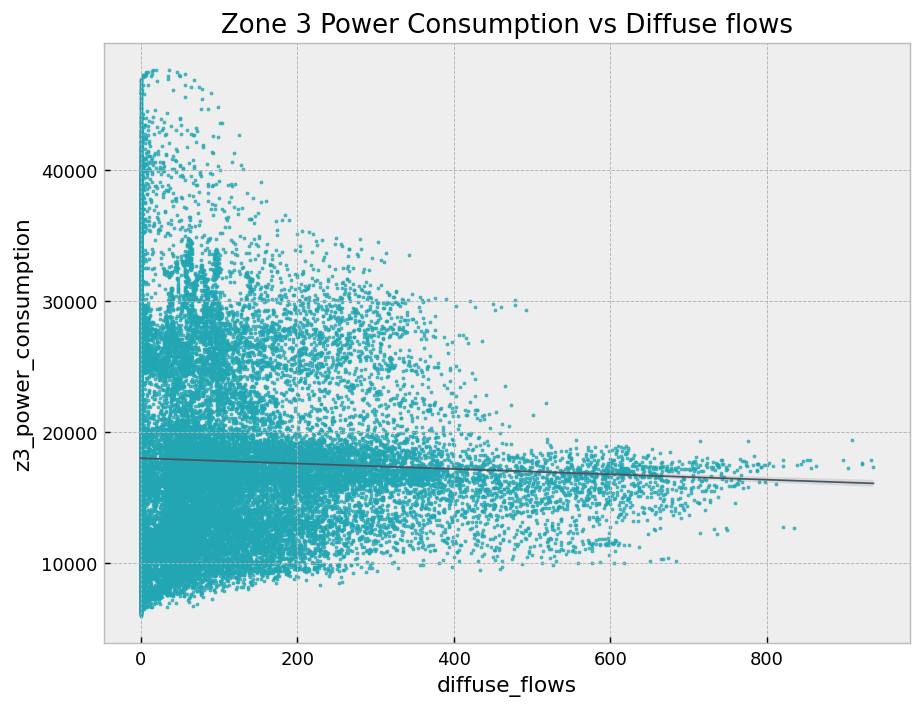

In [ ]:
# Set the figure size and resolution
plt.figure(figsize=(8,6), dpi = 130)

# Use the 'bmh' style for the plot
plt.style.use('bmh')

# Create a scatter plot with a regression line for diffuse flows in Zone 3
sns.regplot(data=pwr,
            x='diffuse_flows',  # Use the 'diffuse_flows' column as the x-axis
            y="z3_power_consumption",  # Use the 'z3_power_consumption' column as the y-axis
            marker="x",  # Use crosses as the scatter plot markers
            scatter_kws={'s':0.75},  # Set the size of the scatter plot markers
            color="#22a6b3",  # Set the color of the scatter plot markers and regression line
            line_kws={'color':'#485460','lw':0.95},  # Set the color and linewidth of the regression line
            order=1)  # Use a polynomial regression of degree 1

# Set the title of the plot
plt.title("Zone 3 Power Consumption vs Diffuse flows")

# Display the plot
plt.show()


A graph was plotted to demonstrate the relationship between diffuse flow and power consumption in Zone 3. It was noted that there is a negative correlation between diffuse flow and power consumption within this zone. However, the correlation was identified as weak, suggesting that although an increase in diffuse flow may result in a slight fall in power consumption.

## 5) Global Diffuse

In [ ]:
# Set the figure resolution to 130 dots per inch
plt.figure(dpi=130)

# Apply the 'bmh' style to the plot
plt.style.use('bmh')

# Create a histogram plot using seaborn's 'histplot' function
# Use the 'pwr' dataframe, with 'general_diffuse_flows' as the x-axis variable
# Apply a kernel density estimate (KDE) and color the plot green
sns.histplot(data=pwr, x="general_diffuse_flows", kde=True, color='green')

# Add a title to the plot
plt.title("General Diffuse Flows")

# Display the plot
plt.show()


A histogram plot was created to analyze the frequency distribution of global diffuse flow values across the dataset. It was observed that there is a significant spike in frequency around the value of 27500 for global diffuse flow. The majority of the data points have frequencies below 750, indicating that aside from the high occurrence at 27500, other values are relatively infrequent.

### Power consumption Zone1 vs Global diffuse

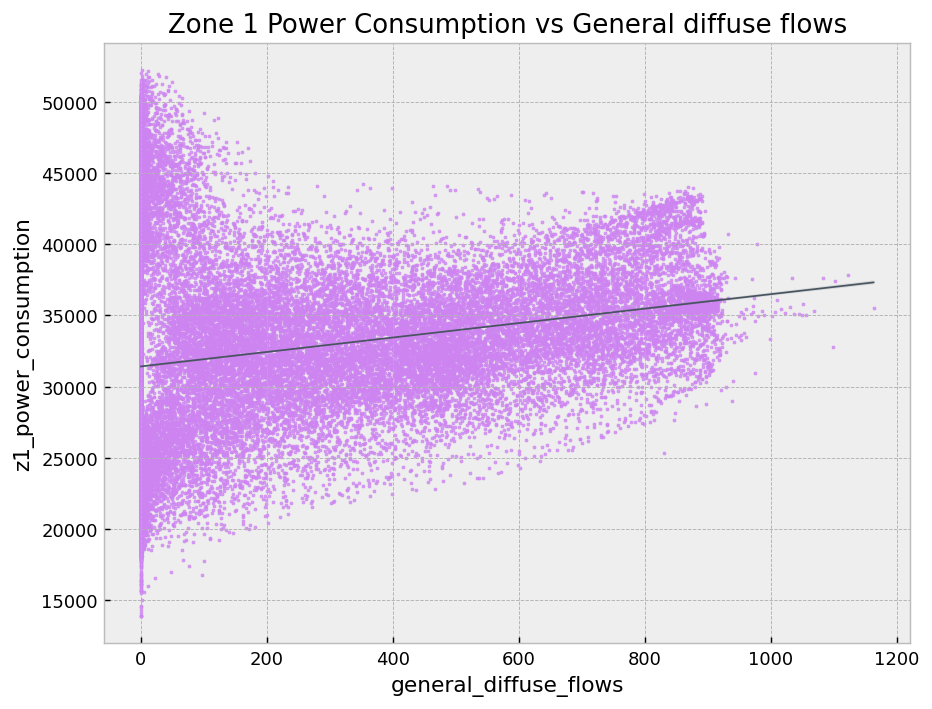

In [ ]:
# Set figure size and resolution
plt.figure(figsize=(8,6), dpi = 130)

# Use the seaborn plot style 'bmh'
plt.style.use('bmh')

# Create a regression plot of power consumption vs. general diffuse flows
sns.regplot(data=pwr,
            x='general_diffuse_flows',  # Set general diffuse flows as x-axis
            y="z1_power_consumption",  # Set power consumption as y-axis
            marker="x",  # Set the marker style to x
            scatter_kws={'s':0.75},  # Set the scatter plot size
            color="#cd84f1",  # Set the color of the scatter plot
            line_kws={'color':'#485460','lw':0.95},  # Set the color and linewidth of the regression line
            order=1) # Set the order of the polynomial used to fit the data

# Add a title to the plot
plt.title("Zone 1 Power Consumption vs General diffuse flows")

# Display the plot
plt.show()


For Zone 1, a graph was plotted to illustrate the relationship between global diffuse flow and power consumption. A strong positive correlation was observed, indicating that as global diffuse flow increases, power consumption also significantly rises. This strong correlation suggests that changes in global diffuse flow have a substantial impact on power consumption levels in Zone 1, highlighting the importance of considering global diffuse flow when analyzing power consumption patterns in this area.

### Power consumption Zone2 vs Global diffuse

In [ ]:
# Set the figure size and resolution
plt.figure(figsize=(8,6), dpi = 130)

# Use the 'bmh' style for the plot
plt.style.use('bmh')

# Create a scatter plot with a regression line for general diffuse flows
sns.regplot(data=pwr,
            x='general_diffuse_flows',  # Use the 'general_diffuse_flows' column as the x-axis
            y="z2_power_consumption",  # Use the 'z2_power_consumption' column as the y-axis
            marker="x",  # Use crosses as the scatter plot markers
            scatter_kws={'s':0.75},  # Set the size of the scatterplot markers
            color="#686de0",  # Set the color of the scatter plot markers and regression line
            line_kws={'color':'#485460','lw':0.95},  # Set the color and linewidth of the regression line
            order=1)  # Use a polynomial regression of degree 1

# Set the title of the plot
plt.title("Zone 2 Power Consumption vs General diffuse flows")

# Display the plot
plt.show()

for Zone 2, a graph was plotted to demonstrate the relationship between global diffuse flow and power consumption. It was found that there exists a strong positive correlation between global diffuse flow and power consumption in this zone. This strong correlation indicates that increases in global diffuse flow are closely associated with significant rises in power consumption levels in Zone 2, emphasizing the notable impact of global diffuse flow on power consumption patterns within this zone.

### Power consumption Zone3 vs Global diffuse

In [ ]:
# Set the figure size and resolution
plt.figure(figsize=(8,6), dpi = 130)

# Use the 'bmh' style for the plot
plt.style.use('bmh')

# Create a scatter plot with a regression line for general diffuse flows in Zone 3
sns.regplot(data=pwr,
            x='general_diffuse_flows',  # Use the 'general_diffuse_flows' column as the x-axis
            y="z3_power_consumption",  # Use the 'z3_power_consumption' column as the y-axis
            marker="x",  # Use crosses as the scatter plot markers
            scatter_kws={'s':0.75},  # Set the size of the scatter plot markers
            color="#22a6b3",  # Set the color of the scatter plot markers and regression line
            line_kws={'color':'#485460','lw':0.95},  # Set the color and linewidth of the regression line
            order=1)  # Use a polynomial regression of degree 1

# Set the title of the plot
plt.title("Zone 3 Power Consumption vs General diffuse flows")

# Display the plot
plt.show()


In Zone 3, a graph was plotted to depict the relationship between global diffuse flow and power consumption. It was noted that there is a strong positive correlation between global diffuse flow and power consumption within this zone. This strong correlation suggests that changes in global diffuse flow have a substantial impact on power consumption levels in Zone 3, underlining the significance of considering global diffuse flow when analyzing power consumption trends in this particular zone.


The power consumption in all zones shows a strong positive correlation with global diffuse flow. As global diffuse flow increases, power consumption rises significantly in each zone. This indicates that changes in global diffuse flow have a substantial impact on power consumption levels across all zones. The strong correlation underscores the importance of considering global diffuse flow when analyzing power consumption patterns in these areas.

## Machine Learning



Our main objective is to predict the power consumption (dependent variable) for the 3 zones of Tetouan based on the 5 features (independent variable) listed above. The question that we like our model to predict is:

> Would temperature, humidity, wind speed, general diffuse flow and diffuse flow play a huge or small part in their overall power consumption through out the year 2017


For the process of designing the machine learning regression model, we chose 5 different regression tasks:


1.   Linear Regression
2.   Ridge Regression
3.   Classification and Regression Trees (CART)
4.   ElasticNet Regression
5.   K Neighbor Regression

For model evaluation, the performance metrics implemented for our model are R Squared and Negative Mean Absolute Error (NMAE). This is to evaluate the effectiveness and accuracy of the predictions made by the regression model.

For model training, we are using k-fold cross-validation. the 'KFold' function is used to split a dataset into multiple folds for the cross-validation function cross_val_score(). The number folds which we set to 10 is then shuffled to ensure the reproducibility by using a random seed set to 69.



### Regression Algorithms

In [ ]:
# Assign the values of the power data (pwr) to a variable named array
array = pwr.values

# Extract the first 5 columns of the array and assign it to X
X = array[:,0:5]

# Extract the 6th column of the array and assign it to Y1
Y1 = array[:,5]

# Extract the 7th column of the array and assign it to Y2
Y2 = array[:,6]

# Extract the 8th column of the array and assign it to Y3
Y3 = array[:,7]

# Set the random seed to 69
random_seed = 69

# Set the scoring metrics
scoring1 = 'r2'
scoring2 = 'neg_mean_absolute_error'

# Set the number of splits for cross-validation to 10
n_splits = 10

# Set the shuffle parameter to True (for shuffling the data)
shuffle = True

# Combine Y1, Y2, and Y3 into a single list named Y
Y = [Y1,Y2,Y3]

# Create a KFold object with the specified parameters and assign it to kfold
kfold = KFold(n_splits=n_splits, random_state=random_seed, shuffle=shuffle)

# Create a Linear Regression model and assign it to reg
reg = LinearRegression()

# Create a Ridge Regression model and assign it to ridge
ridge = Ridge()

# Create a Decision Tree Regression model and assign it to CART
CART = DecisionTreeRegressor()

# Create an ElasticNet model and assign it to enet
enet = ElasticNet()

# Create a K-Neighbors Regression model and assign it to knr
knr = KNeighborsRegressor()

In [ ]:
pwr.head(5)

temperature  humidity  wind_speed  general_diffuse_flows  diffuse_flows  \
0        6.559      73.8       0.083                  0.051          0.119   
1        6.414      74.5       0.083                  0.070          0.085   
2        6.313      74.5       0.080                  0.062          0.100   
3        6.121      75.0       0.083                  0.091          0.096   
4        5.921      75.7       0.081                  0.048          0.085   

   z1_power_consumption  z2_power_consumption  z3_power_consumption  
0           34055.69620           16128.87538           20240.96386  
1           29814.68354           19375.07599           20131.08434  
2           29128.10127           19006.68693           19668.43373  
3           28228.86076           18361.09422           18899.27711  
4           27335.69620           17872.34043           18442.40964

#### 1 Linear Regression


Linear regression is a statistical method to understand the relationship between two variables by fitting a straight line to the data, enabling prediction of one variable based on the other.

In [ ]:
# Print a header for the linear regression results using r2 score
print(f"Linear regression by using metrics r2:\n")

# Iterate through each value in Y, with the index i and value y
for i, y in enumerate(Y):
    # Perform k-fold cross-validation on the regression model with X and y, using the mean r2 score as the metric
    results1 = cross_val_score(reg, X, y, cv=kfold, scoring=scoring1)

    # Print the zone number and its corresponding mean r2 score
    print(f"Zone {i+1} is {results1.mean():.5f}")

# Print a header for the linear regression results using mean absolute error
print(f"\nLinear regression by using metrics negative mean absolute error:\n\n")

# Iterate through each value in Y, with the index i and value y
for i, y in enumerate(Y):
    # Perform k-fold cross-validation on the regression model with X and y, using the mean mean absolute error as the metric
    results2 = cross_val_score(reg, X, y, cv=kfold, scoring=scoring2)

    # Print the zone number and its corresponding mean mean absolute error
    print(f"Zone {i+1} is {results2.mean():.5f}")

Linear regression by using metrics r2:

Zone 1 is 0.20701
Zone 2 is 0.17057
Zone 3 is 0.28116

Linear regression by using metrics negative mean absolute error:


Zone 1 is -5219.73860
Zone 2 is -3826.29079
Zone 3 is -4466.65063


#### 2 Ridge Regression


Ridge regression is a statistical technique used to analyze the relationship between multiple variables when there is multicollinearity, meaning predictors are correlated. It's similar to linear regression but adds a penalty term to the least squares method, preventing overfitting by shrinking the coefficients. This penalty term, controlled by a regularization parameter, helps stabilize the model and reduces its sensitivity to outliers. Ridge regression aims to strike a balance between fitting the data well and keeping the model simple, making it useful for predictive modeling tasks where multicollinearity is present. Overall, it's a valuable tool for improving the accuracy and generalization performance of linear regression models.

In [ ]:
# Print a header for the Ridge Regression results using r2 score
print(f"Ridge Regression by using metrics r2:\n")

# Iterate through each value in Y, with the index i and value y
for i, y in enumerate(Y):
    # Perform k-fold cross-validation on the regression model with X and y, using the mean r2 score as the metric
    results1 = cross_val_score(ridge, X, y, cv=kfold, scoring=scoring1)

    # Print the zone number and its corresponding mean r2 score
    print(f"Zone {i+1} is {results1.mean():.5f}")

# Print a header for the Ridge Regression results using mean absolute error
print(f"\nRidge Regression by using metrics negative mean absolute error:\n")

# Iterate through each value in Y, with the index i and value y
for i, y in enumerate(Y):
    # Perform k-fold cross-validation on the regression model with X and y, using the to mean absolute error as the metric
    results2 = cross_val_score(ridge, X, y, cv=kfold, scoring=scoring2)

    # Print the zone number and its corresponding to mean absolute error
    print(f"Zone {i+1} is {results2.mean():.5f}")

Ridge Regression by using metrics r2:

Zone 1 is 0.20701
Zone 2 is 0.17057
Zone 3 is 0.28116

Ridge Regression by using metrics negative mean absolute error:

Zone 1 is -5219.73861
Zone 2 is -3826.29077
Zone 3 is -4466.65049


#### 3 Classification and Regression Trees (CART)

CART regression, or Classification and Regression Trees, is a method for predicting a continuous outcome based on input features. It works by partitioning the data into smaller subsets, then fitting simple models (typically binary splits) to each subset. These splits are chosen to minimize the variance in the outcome variable. CART regression continues this process recursively, creating a tree-like structure where each node represents a split and each leaf node contains the predicted value. It's a powerful technique for understanding complex relationships in data and can handle nonlinearities effectively, making it useful for various predictive modeling tasks.

In [ ]:
# Print a header for the Classification and Regression Trees (CART) results using r2 score
print(f"Classification and Regression Trees (CART) by using metrics r2:\n\n")

# Iterate through each value in Y, with the index i and value y
for i, y in enumerate(Y):
    # Perform k-fold cross-validation on the regression model with X and y, using the mean r2 score as the metric
    results1 = cross_val_score(CART, X, y, cv=kfold, scoring=scoring1)

    # Print the zone number and its corresponding mean r2 score
    print(f"Zone {i+1} is {results1.mean():.5f}")

# Print a header for the Classification and Regression Trees (CART) results using mean absolute error
print(f"\nClassification and Regression Trees (CART) by using metrics negative mean absolute error:\n\n")

# Iterate through each value in Y, with the index i and value y
for i, y in enumerate(Y):
    # Perform k-fold cross-validation on the regression model with X and y, using the to mean absolute error as the metric
    results2 = cross_val_score(CART, X, y, cv=kfold, scoring=scoring2)

    # Print the zone number and its corresponding to mean absolute error
    print(f"Zone {i+1} is {results2.mean():.5f}")

Classification and Regression Trees (CART) by using metrics r2:


Zone 1 is 0.17478
Zone 2 is 0.15248
Zone 3 is 0.44889

Classification and Regression Trees (CART) by using metrics negative mean absolute error:


Zone 1 is -3849.51695
Zone 2 is -2936.59109
Zone 3 is -2903.47231


#### 4 ElasticNet Regression

Elastic Net regression is a statistical method that combines features of both Ridge and Lasso regression. It helps in selecting important variables while handling multicollinearity by adding a penalty term to the least squares method. This penalty term includes both L1 (Lasso) and L2 (Ridge) penalties, allowing for more flexibility in regularization. Elastic Net regression strikes a balance between feature selection and model stability, making it useful for predictive modeling tasks with many correlated predictors.

In [ ]:
# Print a header for the ElasticNet Regression results using r2 score
print(f"ElasticNet Regression by using metrics r2:\n")

# Iterate through each value in Y, with the index i and value y
for i, y in enumerate(Y):
    # Perform k-fold cross-validation on the regression model with X and y, using the mean r2 score as the metric
    results1 = cross_val_score(enet, X, y, cv=kfold, scoring=scoring1)

    # Print the zone number and its corresponding mean r2 score
    print(f"Zone {i+1} is {results1.mean():.5f}")

# Print a header for the ElasticNet Regression results using mean absolute error
print(f"\nElasticNet Regression by using metrics negative mean absolute error:\n\n")

# Iterate through each value in Y, with the index i and value y
for i, y in enumerate(Y):
    # Perform k-fold cross-validation on the regression model with X and y, using the to mean absolute error as the metric
    results2 = cross_val_score(enet, X, y, cv=kfold, scoring=scoring2)

    # Print the zone number and its corresponding to mean absolute error
    print(f"Zone {i+1} is {results2.mean():.5f}")

ElasticNet Regression by using metrics r2:

Zone 1 is 0.20690
Zone 2 is 0.17050
Zone 3 is 0.28108

ElasticNet Regression by using metrics negative mean absolute error:


Zone 1 is -5220.36810
Zone 2 is -3826.23163
Zone 3 is -4463.66055


#### 5 K Nearest Neighbor (KNN) Regression


K Nearest Neighbors (KNN) regression is a simple algorithm used for predicting the value of a new data point based on the average value of its nearest neighbors. It doesn't assume any underlying data distribution and works well with nonlinear relationships. To make a prediction, it calculates the distance between the new data point and all other points in the training set, then selects the 'k' nearest neighbors. Finally, it averages the target values of these neighbors to predict the target value for the new data point. KNN regression is intuitive and easy to understand, making it popular for various regression tasks.

In [ ]:
# Print a header for the K Neighbor Regression results using r2 score
print(f"K Neighbor Regression by using metrics r2:\n\n")

# Iterate through each value in Y, with the index i and value y
for i, y in enumerate(Y):
    # Perform k-fold cross-validation on the regression model with X and y, using the mean r2 score as the metric
    results1 = cross_val_score(knr, X, y, cv=kfold, scoring=scoring1)

    # Print the zone number and its corresponding mean r2 score
    print(f"Zone {i+1} is {results1.mean():.5f}")

# Print a header for the K Neighbor Regression results using mean absolute error
print(f"\nK Neighbor Regression by using metrics negative mean absolute error:\n\n")

# Iterate through each value in Y, with the index i and value y
for i, y in enumerate(Y):
    # Perform k-fold cross-validation on the regression model with X and y, using the to mean absolute error as the metric
    results2 = cross_val_score(knr, X, y, cv=kfold, scoring=scoring2)

    # Print the zone number and its corresponding to mean absolute error
    print(f"Zone {i+1} is {results2.mean():.5f}")

K Neighbor Regression by using metrics r2:


Zone 1 is 0.35359
Zone 2 is 0.30455
Zone 3 is 0.46537

K Neighbor Regression by using metrics negative mean absolute error:


Zone 1 is -4141.42445
Zone 2 is -3205.15713
Zone 3 is -3579.48212


### Model Performance


From the R2 and NMAE scores obtained for each regression model in the three zones, we can make several inferences:


1.   Linear Regression and Ridge Regression:


Both have similar scores across zone 1,2,3. The r2 scores are also relatively low which does not best represent the variance in Tetouan's power consumption. This model is not preferred as it does not capture the nonlinear relationships present in the data.



2.   Classification and Regression Trees (CART):

CART shows a higher R2 score compared to Linear Regression and Ridge Regression in all three zones. CART may be better at capturing the underlying patterns in the data, potentially due to its ability to handle nonlinear relationships and interactions between variables.

3.   ElasticNet Regression:

ElasticNet Regression yields results similar to Linear Regression and Ridge Regression, with slightly higher R2 scores.
However, the improvement in performance compared to Linear Regression and Ridge Regression is minimal.

4.  K Nearest Neighbor (KNN) Regression:

Based on the results, it appears that K Nearest Neighbor Regression performs the best among the models tested, as it consistently achieves higher R2 scores across all three zones. Therefore, KNN Regression may be the preferred choice for predicting power consumption. However, further analysis and validation may be necessary to confirm the model's effectiveness and generalizability.




In [ ]:
# Define the models
models_name = ("LR", "Ridge", "CART", "ENet", "KNR")
models_func = (LinearRegression(), Ridge(), DecisionTreeRegressor(), ElasticNet(), KNeighborsRegressor())

# Create a dictionary with the models
models = dict(zip(models_name, models_func))

# Initialize the results lists
z1_results1 = []
z2_results1 = []
z3_results1 = []
z1_results2 = []
z2_results2 = []
z3_results2 = []

all_results1 = [z1_results1, z2_results1, z3_results1]
all_results2 = [z1_results2, z2_results2, z3_results2]

# Iterate through the target variables and the results lists
for i, y in enumerate(Y):
    # Initialize the list of cross-validation results
    cv_results1 = []
    cv_results2 = []
    # Iterate through the models and perform cross-validation
    for regr_model in models.values():
        cv_results1.append(cross_val_score(regr_model, X, y, cv=kfold, scoring=scoring1))
        cv_results2.append(cross_val_score(regr_model, X, y, cv=kfold, scoring=scoring2))
    # Append the cross-validation results to the corresponding results list
    all_results1[i].extend(cv_results1)
    all_results2[i].extend(cv_results2)

#### R2 (Coefficient of Determination)

R2 also known as *coefficient of determination*  is used to assess how well a model fit to the observed data.It shows the variability of the dependent variable. In this case, the R-Square score are determined for the 3 zones of Tetouan City's power consumption. To evaluate the r2 score,  the closest value R2 to 1, the better the model is at predicting the power consumption value.


##### Model on Zone 1

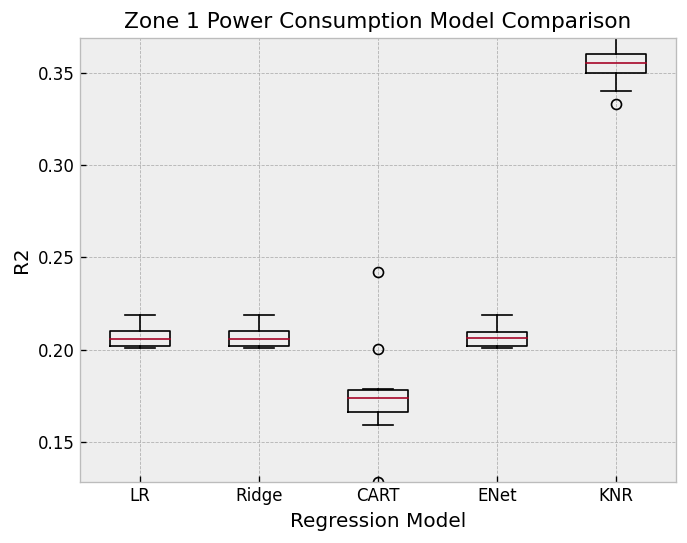

In [ ]:
# Set the resolution of the figure
plt.figure(dpi=120)

# Create a boxplot of the cross-validation results
plt.boxplot(all_results1[0], labels=models.keys())

# Set the title of the plot
plt.title("Zone 1 Power Consumption Model Comparison", fontsize=13)

# Set the label for the x-axis
plt.xlabel("Regression Model")

# Set the label for the y-axis
plt.ylabel("R2")

# Automatically adjust the axis limits to fit the data
plt.autoscale(tight=True)

# Display the plot
plt.show()

##### Model on Zone 2

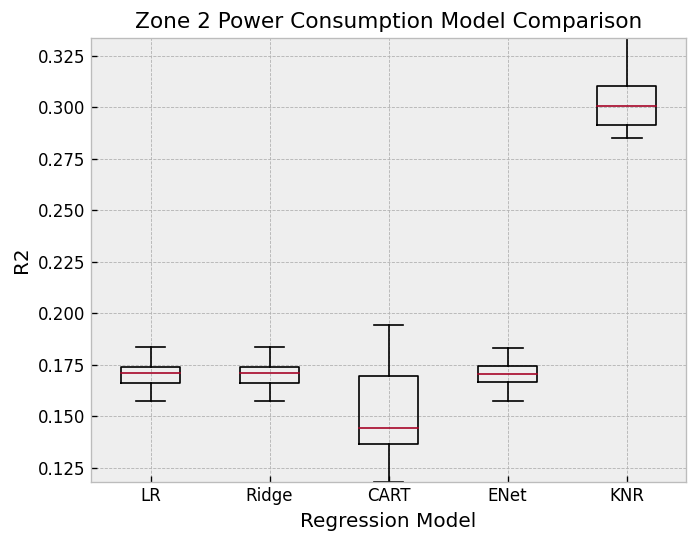

In [ ]:
# Set the resolution of the figure
plt.figure(dpi=120)

# Create a boxplot of the cross-validation results
plt.boxplot(all_results1[1], labels=models.keys())

# Set the title of the plot
plt.title("Zone 2 Power Consumption Model Comparison", fontsize=13)

# Set the label for the x-axis
plt.xlabel("Regression Model")

# Set the label for the y-axis
plt.ylabel("R2")

# Automatically adjust the axis limits to fit the data
plt.autoscale(tight=True)

# Display the plot
plt.show()

##### Model on Zone 3

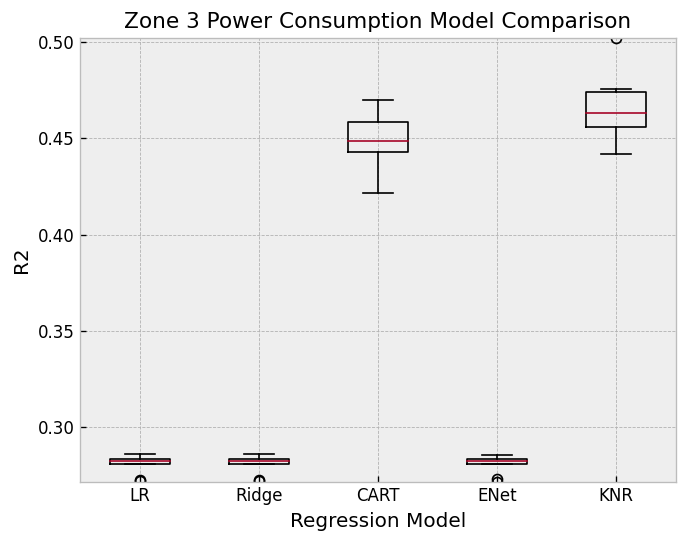

In [ ]:
# Set the resolution of the figure
plt.figure(dpi=120)

# Create a boxplot of the cross-validation results
plt.boxplot(all_results1[2], labels=models.keys())

# Set the title of the plot
plt.title("Zone 3 Power Consumption Model Comparison", fontsize=13)

# Set the label for the x-axis
plt.xlabel("Regression Model")

# Set the label for the y-axis
plt.ylabel("R2")

# Automatically adjust the axis limits to fit the data
plt.autoscale(tight=True)

# Display the plot
plt.show()

R2 measures how well the model captures the variance in the data. A higher value indicates that the model explains more of the variance in the target variable and has lower SSE ( Sum of Squares due to Error ).
KNN operates by finding the K closest data points to a given data point and predicting its target value based on the average in regression of the target values of those neighbors.
KNN captures the variance in the data by averaging the target values of the K nearest neighbors. If the data exhibits clear patterns or clusters, KNN can perform well and achieve a high R2 value by accurately predicting the target values within those clusters.

#### Negative Mean Absolute Error (NMAE)

NMAE is used to detect the accuracy of the model.  If it is closer to 0, it means the model's predictions are closer to the actual values, relative to the range of the target variable. The NMAE score was being compared.

##### Model on Zone 1

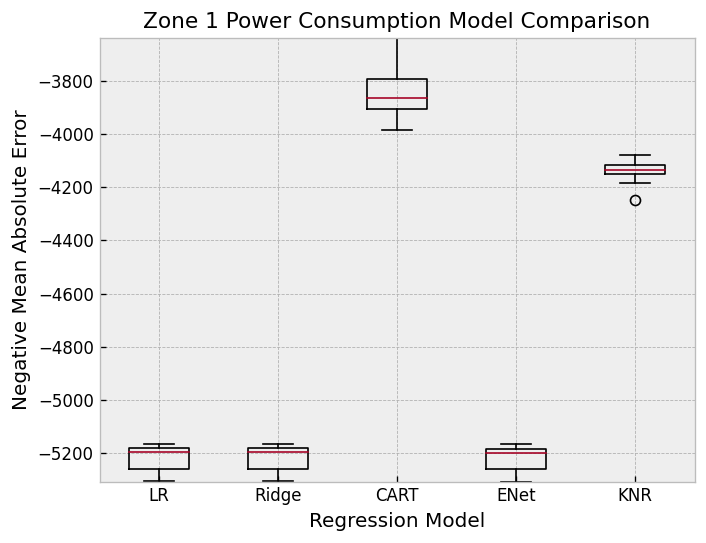

In [ ]:
# Set the resolution of the figure
plt.figure(dpi=120)

# Create a boxplot of the cross-validation results for
plt.boxplot(all_results2[0], labels=models.keys())

# Set the title of the plot
plt.title("Zone 1 Power Consumption Model Comparison", fontsize=13)

# Set the label for the x-axis
plt.xlabel("Regression Model")

# Set the label for the y-axis
plt.ylabel("Negative Mean Absolute Error")

# Automatically adjust the axis limits to fit the data
plt.autoscale(tight=True)

# Display the plot
plt.show()

##### Model on Zone 2

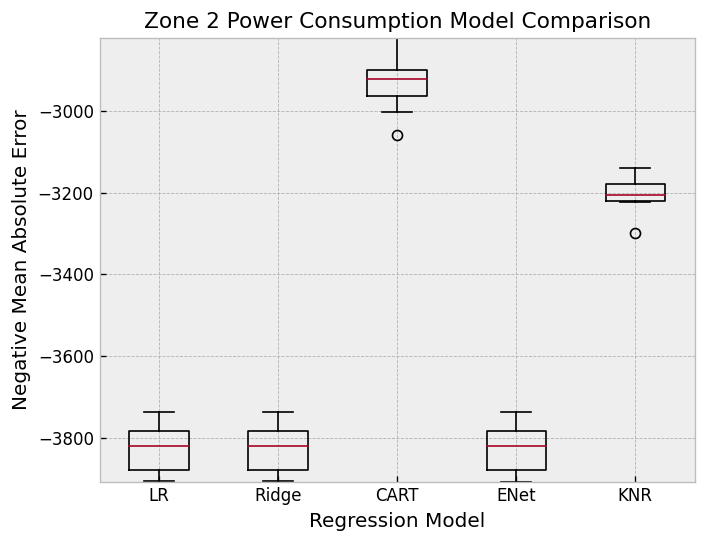

In [ ]:
# Set the resolution of the figure
plt.figure(dpi=120)

# Create a boxplot of the cross-validation results for
plt.boxplot(all_results2[1], labels=models.keys())

# Set the title of the plot
plt.title("Zone 2 Power Consumption Model Comparison", fontsize=13)

# Set the label for the x-axis
plt.xlabel("Regression Model")

# Set the label for the y-axis
plt.ylabel("Negative Mean Absolute Error")

# Automatically adjust the axis limits to fit the data
plt.autoscale(tight=True)

# Display the plot
plt.show()

##### Model on Zone 3

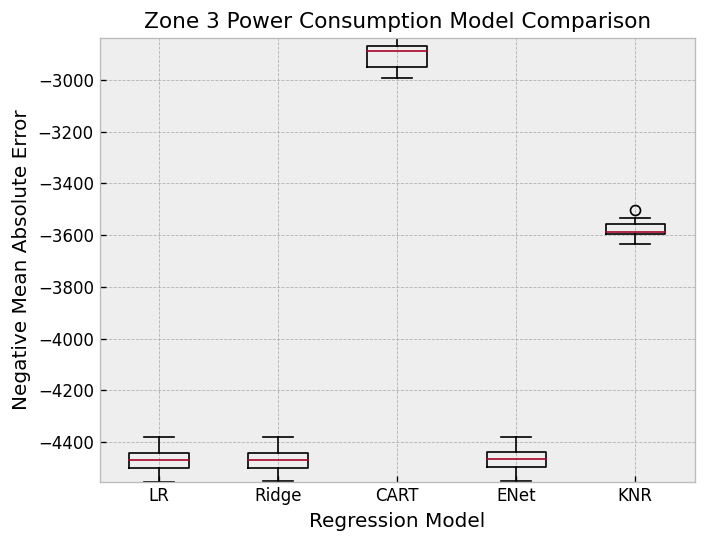

In [ ]:
# Set the resolution of the figure
plt.figure(dpi=120)

# Create a boxplot of the cross-validation results for
plt.boxplot(all_results2[2], labels=models.keys())

# Set the title of the plot
plt.title("Zone 3 Power Consumption Model Comparison", fontsize=13)

# Set the label for the x-axis
plt.xlabel("Regression Model")

# Set the label for the y-axis
plt.ylabel("Negative Mean Absolute Error")

# Automatically adjust the axis limits to fit the data
plt.autoscale(tight=True)

# Display the plot
plt.show()

Negative Mean Absolute Error (Negative MAE) is a measure of the average magnitude of errors between the predicted values and the actual values. negative MAE value closer to zero is better performance.
CART is a decision tree algorithm that recursively splits the data into subsets based on the features, aiming to minimize the variance of the target variable at each split.
CART is good at capturing complex relationships between features and the target variable, as it can create non-linear decision boundaries.
CART builds a tree structure that partitions the feature space into regions with relatively homogeneous target values. This can lead to accurate predictions, especially when the relationship between the features and the target is complex or non-linear. CART aims to minimize the error in prediction, which is reflected in a low MAE.

## Conclusion

In summary, data of power consumption in Tetouan City describe that in each zone, power consumption is positively associated with temperature, wind speed, diffuse, and global diffuse, but negatively associated with humidity. K-nearest regression (KNR) outperforms other models in terms of R2 (coefficient of determination), indicating better overall predictive accuracy. On the other hand, CART (Classification and Regression Trees) excels in minimizing the normalized mean absolute error (NMAE), making it the top performer in terms of predictive precision.

## References

1. Power Consumption of Tetouan City - UCI Machine Learning Repository. (n.d.). Retrieved April 5, 2024, from https://archive.ics.uci.edu/dataset/849/power+consumption+of+tetouan+city

2. Salam, A., & Hibaoui, A. el. (2018). Comparison of Machine Learning Algorithms for the Power Consumption Prediction : - Case Study of Tetouan city –. International Renewable and Sustainable Energy Conference. https://doi.org/10.1109/IRSEC.2018.8703007

3. Mastering Classification and Regression Trees (CART) in Machine Learning: A Comprehensive Guide | by Nilimesh Halder, PhD | AI Mind. (n.d.). Retrieved April 5, 2024, from https://pub.aimind.so/mastering-classification-and-regression-trees-cart-in-machine-learning-a-comprehensive-guide-26eae15f6fd4

4. Day 3 — K-Nearest Neighbors and Bias–Variance Tradeoff | by Tzu-Chi Lin | 30 days of Machine Learning | Medium. (n.d.). Retrieved April 5, 2024, from https://medium.com/30-days-of-machine-learning/day-3-k-nearest-neighbors-and-bias-variance-tradeoff-75f84d515bdb

5. Elastic Net Regression detailed guide ! | by Shruti Dhumne | Medium. (n.d.). Retrieved April 5, 2024, from https://medium.com/@shruti.dhumne/elastic-net-regression-detailed-guide-99dce30b8e6e

6. What Is Linear Regression? | IBM. (n.d.). Retrieved April 5, 2024, from https://www.ibm.com/topics/linear-regression

7. Lasso & Ridge Regression | A Comprehensive Guide in Python & R. (n.d.). Retrieved April 5, 2024, from https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/

5. Which Metrics in Regression matter the most? MSE|RMSE|MAE|R2|Adj R2- Advantages/Disadvantages | by Induraj | Medium. (n.d.). Retrieved April 5, 2024, from https://induraj2020.medium.com/which-metrics-in-regression-matter-the-most-mse-rmse-mae-r2-adj-r2-advantages-disadvantages-55740cb873ec